In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
from pandas.io.stata import StataReader

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Profiling
import ydata_profiling as yp

# 1. Reading the data

In [2]:
# Read the file and the labels
with StataReader('../stata/amostra_domicilios_2010_RJ.dta') as reader:
    data_micro = reader.read(convert_categoricals=False)
    col_labels = reader.variable_labels()
    value_labels = reader.value_labels()

# Remove '_lbl' from the keys in value_labels
value_labels = {k.replace('_lbl', ''): v for k, v in value_labels.items()}

# Apply the labels to the data
for col, labels in value_labels.items():
    if col in data_micro:
        data_micro[col] = data_micro[col].map(labels)

# Apply the labels to the columns
data_micro = data_micro.rename(columns=col_labels)

# Convert ÁREA DE PONDERAÇÃO to int64
data_micro['ÁREA DE PONDERAÇÃO'] = data_micro['ÁREA DE PONDERAÇÃO'].astype('int64')

In [3]:
data_micro.head()

,UNIDADE DA FEDERAÇÃO,CÓDIGO DO MUNICÍPIO,ÁREA DE PONDERAÇÃO,CONTROLE,PESO AMOSTRAL,REGIÃO GEOGRÁFICA,CÓDIGO DA MESORREGIÃO,CÓDIGO DA MICRORREGIÃO,CÓDIGO DA REGIÃO METROPOLITANA,SITUAÇÃO DO DOMICÍLIO,...,MARCA DE IMPUTAÇÃO NA V0218,MARCA DE IMPUTAÇÃO NA V0219,MARCA DE IMPUTAÇÃO NA V0220,MARCA DE IMPUTAÇÃO NA V0221,MARCA DE IMPUTAÇÃO NA V0222,MARCA DE IMPUTAÇÃO NA V0301,MARCA DE IMPUTAÇÃO NA V0401,MARCA DE IMPUTAÇÃO NA V0402,MARCA DE IMPUTAÇÃO NA V0701,Situação do setor
0,Rio de Janeiro,Angra dos Reis,3300100003001,12833.0,1.072009e+14,Região sudeste (uf=31 a 33 e 35),Sul Fluminense,Baía da Ilha Grande,0,Urbana,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Área urbanizada
1,Rio de Janeiro,Angra dos Reis,3300100003001,20358.0,1.901061e+14,Região sudeste (uf=31 a 33 e 35),Sul Fluminense,Baía da Ilha Grande,0,Rural,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Área rural de extensão urbana
2,Rio de Janeiro,Angra dos Reis,3300100003001,27895.0,8.929838e+13,Região sudeste (uf=31 a 33 e 35),Sul Fluminense,Baía da Ilha Grande,0,Urbana,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Área urbanizada
3,Rio de Janeiro,Angra dos Reis,3300100003001,42944.0,1.405041e+14,Região sudeste (uf=31 a 33 e 35),Sul Fluminense,Baía da Ilha Grande,0,Urbana,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Área urbanizada
4,Rio de Janeiro,Angra dos Reis,3300100003001,52534.0,1.233563e+14,Região sudeste (uf=31 a 33 e 35),Sul Fluminense,Baía da Ilha Grande,0,Urbana,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Área urbanizada


In [4]:
df_rio = data_micro[data_micro['CÓDIGO DO MUNICÍPIO'] == 'Rio de Janeiro']
df_rio.info()
df_rio.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104712 entries, 196547 to 301258
Data columns (total 76 columns):
 #   Column                                                                            Non-Null Count   Dtype  
---  ------                                                                            --------------   -----  
 0   UNIDADE DA FEDERAÇÃO                                                              104712 non-null  object 
 1   CÓDIGO DO MUNICÍPIO                                                               104712 non-null  object 
 2   ÁREA DE PONDERAÇÃO                                                                104712 non-null  int64  
 3   CONTROLE                                                                          104712 non-null  float64
 4   PESO AMOSTRAL                                                                     104712 non-null  float64
 5   REGIÃO GEOGRÁFICA                                                                 104712 non-nu

,UNIDADE DA FEDERAÇÃO,CÓDIGO DO MUNICÍPIO,ÁREA DE PONDERAÇÃO,CONTROLE,PESO AMOSTRAL,REGIÃO GEOGRÁFICA,CÓDIGO DA MESORREGIÃO,CÓDIGO DA MICRORREGIÃO,CÓDIGO DA REGIÃO METROPOLITANA,SITUAÇÃO DO DOMICÍLIO,...,MARCA DE IMPUTAÇÃO NA V0218,MARCA DE IMPUTAÇÃO NA V0219,MARCA DE IMPUTAÇÃO NA V0220,MARCA DE IMPUTAÇÃO NA V0221,MARCA DE IMPUTAÇÃO NA V0222,MARCA DE IMPUTAÇÃO NA V0301,MARCA DE IMPUTAÇÃO NA V0401,MARCA DE IMPUTAÇÃO NA V0402,MARCA DE IMPUTAÇÃO NA V0701,Situação do setor
196547,Rio de Janeiro,Rio de Janeiro,3304557005001,2171.0,1.824236e+14,Região sudeste (uf=31 a 33 e 35),Metropolitana do Rio de Janeiro,Rio de Janeiro,19,Urbana,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Área urbanizada
196548,Rio de Janeiro,Rio de Janeiro,3304557005001,11523.0,2.207511e+14,Região sudeste (uf=31 a 33 e 35),Metropolitana do Rio de Janeiro,Rio de Janeiro,19,Urbana,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Área urbanizada
196549,Rio de Janeiro,Rio de Janeiro,3304557005001,13794.0,1.441748e+14,Região sudeste (uf=31 a 33 e 35),Metropolitana do Rio de Janeiro,Rio de Janeiro,19,Urbana,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Área urbanizada
196550,Rio de Janeiro,Rio de Janeiro,3304557005001,22268.0,1.832662e+14,Região sudeste (uf=31 a 33 e 35),Metropolitana do Rio de Janeiro,Rio de Janeiro,19,Urbana,...,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Área urbanizada
196551,Rio de Janeiro,Rio de Janeiro,3304557005001,37328.0,1.783257e+14,Região sudeste (uf=31 a 33 e 35),Metropolitana do Rio de Janeiro,Rio de Janeiro,19,Urbana,...,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Área urbanizada


# 2. Importando SHP

In [5]:
from scipy import stats
import statsmodels.formula.api as sm
import os

# para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# para a análise de dados espaciais
import geopandas as gp
import pysal as ps
import splot
import mapclassify as mc
# from libpysal.weights import Queen
# from libpysal import weights
# from esda import Moran, Moran_Local, G_Local
# from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

In [6]:
gdf = gp.read_file('shp/rj_setores_censitarios/33SEE250GC_SIR.shp')

In [10]:
gdf_rio = gdf[gdf['NM_MUNICIP'] == 'RIO DE JANEIRO']
gdf_rio.info()
gdf_rio.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10504 entries, 10708 to 23328
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          10504 non-null  int64   
 1   CD_GEOCODI  10504 non-null  object  
 2   TIPO        10504 non-null  object  
 3   CD_GEOCODB  10504 non-null  object  
 4   NM_BAIRRO   10504 non-null  object  
 5   CD_GEOCODS  10504 non-null  object  
 6   NM_SUBDIST  10504 non-null  object  
 7   CD_GEOCODD  10504 non-null  object  
 8   NM_DISTRIT  10504 non-null  object  
 9   CD_GEOCODM  10504 non-null  object  
 10  NM_MUNICIP  10504 non-null  object  
 11  NM_MICRO    10504 non-null  object  
 12  NM_MESO     10504 non-null  object  
 13  geometry    10504 non-null  geometry
dtypes: geometry(1), int64(1), object(12)
memory usage: 1.2+ MB


,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
10708,56651,330455705080006,URBANO,330455705005,Catumbi,33045570508,RIO COMPRIDO,330455705,RIO DE JANEIRO,3304557,RIO DE JANEIRO,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,"POLYGON ((-43.19949 -22.92454, -43.19953 -22.9..."
10709,56652,330455705080007,URBANO,330455705005,Catumbi,33045570508,RIO COMPRIDO,330455705,RIO DE JANEIRO,3304557,RIO DE JANEIRO,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,"POLYGON ((-43.19795 -22.91829, -43.19819 -22.9..."
10710,56653,330455705080008,URBANO,330455705005,Catumbi,33045570508,RIO COMPRIDO,330455705,RIO DE JANEIRO,3304557,RIO DE JANEIRO,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,"POLYGON ((-43.19858 -22.91876, -43.19888 -22.9..."
10711,56654,330455705080009,URBANO,330455705005,Catumbi,33045570508,RIO COMPRIDO,330455705,RIO DE JANEIRO,3304557,RIO DE JANEIRO,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,"POLYGON ((-43.19879 -22.91937, -43.19879 -22.9..."
10712,56655,330455705080010,URBANO,330455705005,Catumbi,33045570508,RIO COMPRIDO,330455705,RIO DE JANEIRO,3304557,RIO DE JANEIRO,RIO DE JANEIRO,METROPOLITANA DO RIO DE JANEIRO,"POLYGON ((-43.19791 -22.92028, -43.19791 -22.9..."


# 3. Plotando o mapa

C:\Users\gianl\AppData\Local\Temp\ipykernel_18652\3481444330.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.text(gdf_rio.geometry.centroid[i].coords[0][0], gdf_rio.geometry.centroid[i].coords[0][1], gdf_rio.NM_BAIRRO[i],


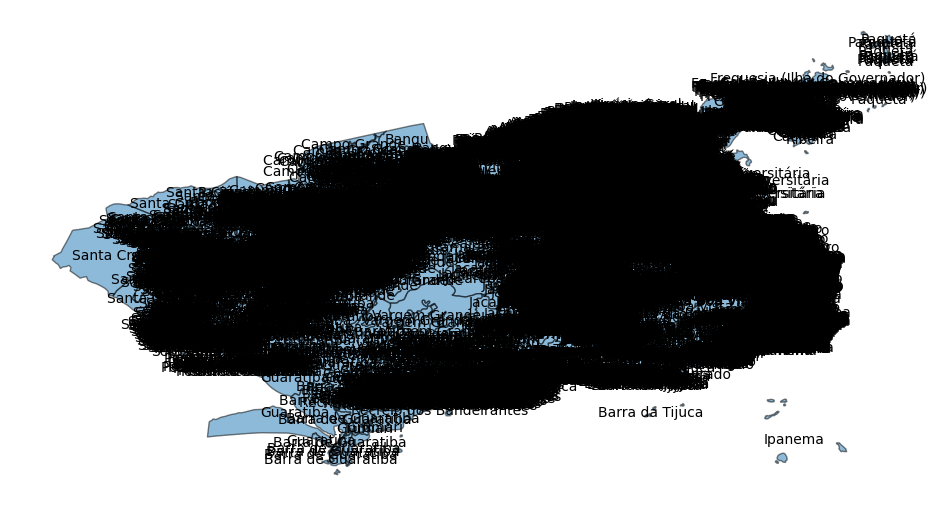

In [29]:
ax = gdf_rio.plot(figsize=(12, 12), alpha=0.5, edgecolor='k');

for i in gdf_rio.index:
    plt.text(gdf_rio.geometry.centroid[i].coords[0][0], gdf_rio.geometry.centroid[i].coords[0][1], gdf_rio.NM_BAIRRO[i],
             fontsize=10, horizontalalignment='center', verticalalignment='center');

ax.set_axis_off();

In [11]:
# Create a new GeoDataFrame with the centroid of each unique NM_BAIRRO
gdf_rio_unique = gdf_rio.dissolve(by='NM_BAIRRO', aggfunc='first').reset_index()

ax = gdf_rio.plot(figsize=(12, 12), alpha=0.5, edgecolor='k')

for i in gdf_rio_unique.index:
    plt.text(gdf_rio_unique.geometry.centroid[i].coords[0][0], gdf_rio_unique.geometry.centroid[i].coords[0][1], gdf_rio_unique.NM_BAIRRO[i],
             fontsize=10, horizontalalignment='center', verticalalignment='center')

ax.set_axis_off()

C:\Users\gianl\AppData\Local\Temp\ipykernel_26596\2241908334.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.text(gdf_rio_unique.geometry.centroid[i].coords[0][0], gdf_rio_unique.geometry.centroid[i].coords[0][1], gdf_rio_unique.NM_BAIRRO[i],


# 0. Testes